<a href="https://colab.research.google.com/github/shemi024/regression-correlation/blob/main/data_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/DataPreprocessing.csv')

In [ ]:
data.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [ ]:
data.isna().sum()

Region            0
Age               1
Income            1
Online Shopper    0
dtype: int64

In [ ]:
for i in ['Age','Income']:
  data[i]=data[i].fillna(data[i].median())
data.isna().sum()

Region            0
Age               0
Income            0
Online Shopper    0
dtype: int64

In [ ]:
data.drop('Region',axis=1,inplace=True)

In [ ]:
data=pd.get_dummies(data)
data.head()

,Age,Income,Online Shopper_No,Online Shopper_Yes
0,49.0,86400.0,1,0
1,32.0,57600.0,0,1
2,35.0,64800.0,1,0
3,43.0,73200.0,1,0
4,45.0,73200.0,0,1


In [ ]:
corrmatrix= data.corr

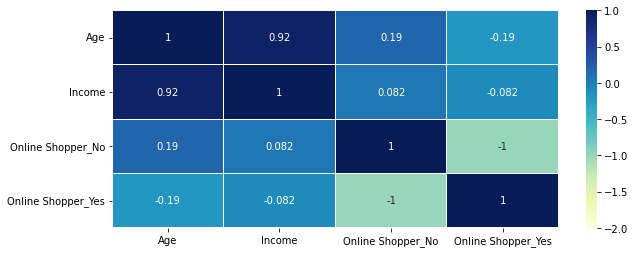

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize =(10,4))
sns.heatmap(corrmatrix, vmin=-2, vmax=1, annot = True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
data.columns

Index(['Age', 'Income', 'Online Shopper_No', 'Online Shopper_Yes'], dtype='object')

In [ ]:
x=data.drop('Online Shopper_No',axis=1)
y=data['Online Shopper_No']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


In [ ]:
from sklearn import  linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_tarin)

In [ ]:
#predict the output
predictions = model.predict(x_test)

In [ ]:
#original value in y_test
print(y_test)

8    1
1    0
5    0
Name: Online Shopper_No, dtype: uint8


In [ ]:
print(predictions)

[1.00000000e+00 4.44089210e-16 2.22044605e-16]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 1.8488927466117464e-31
